## Create Dataframe \& columns for all particles.

In [1]:
import os 
print("current working directory: ", os.getcwd())
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysisMC")
print("changed directory to: ", os.getcwd())
print(os.listdir())

current working directory:  /w/halld-scshelf2101/home/dbarton/gluex/dselectors
changed directory to:  /w/halld-scshelf2101/home/dbarton/gluex/analysisMC
['KKpi_mc_v1.root', 'KKpi_mcTHROWN_vTYLER.root', 'KKpi_mc_vTYLER.root', 'readROOT_TreesHeaders.ipynb', 'mcKKpi_flat_bx2_analysis.ipynb', 'config_files', 'mcKKpi_thrown.ipynb']


In [3]:
import ROOT

file = ROOT.TFile.Open("/work/halld/home/dbarton/gluex/dselectors/KKpi_mcThrown.root")
print("Contents of current ROOT file: ")
file.ls()

Contents of current ROOT file: 
TFile**		/work/halld/home/dbarton/gluex/dselectors/KKpi_mcThrown.root	
 TFile*		/work/halld/home/dbarton/gluex/dselectors/KKpi_mcThrown.root	
  KEY: TTree	pipkmks_flat_Thrown;1	pipkmks_flat_Thrown


### Print tree(s) and branches in .ROOT file

In [4]:
import ROOT

filename = "/work/halld/home/dbarton/gluex/dselectors/KKpi_mcThrown.root"

def list_trees_and_branches(filename):
    file = ROOT.TFile.Open(filename)
    # Loop over all keys in the file
    for key in file.GetListOfKeys():
        obj = key.ReadObj()
        # Check if the object is a tree
        if isinstance(obj, ROOT.TTree):
            tree = obj
            print(f"File: {filename}")
            print(f"Tree: {tree.GetName()}")
            print("Branches:")
            # List all branches in the tree
            branches = tree.GetListOfBranches()
            for branch in branches:
                print(f" - {branch.GetName()}")

    # Close the file
    file.Close()
list_trees_and_branches(filename)

File: /work/halld/home/dbarton/gluex/dselectors/KKpi_mcThrown.root
Tree: pipkmks_flat_Thrown
Branches:
 - nParticles
 - nThrown
 - beam_px
 - beam_py
 - beam_pz
 - beam_E
 - target_px
 - target_py
 - target_pz
 - target_E
 - pip1_px
 - pip1_py
 - pip1_pz
 - pip1_E
 - pip2_px
 - pip2_py
 - pip2_pz
 - pip2_E
 - pim_px
 - pim_py
 - pim_pz
 - pim_E
 - km_px
 - km_py
 - km_pz
 - km_E
 - proton_px
 - proton_py
 - proton_pz
 - proton_E
 - ks_px
 - ks_py
 - ks_pz
 - ks_E
 - theta_p
 - mom_p
 - phi_p
 - theta_km
 - mom_km
 - phi_km
 - theta_pip1
 - mom_pip1
 - phi_pip1
 - theta_pip2
 - mom_pip2
 - phi_pip2
 - theta_pim
 - mom_pim
 - phi_pim
 - theta_f1
 - mom_f1
 - phi_f1
 - mass_f1
 - mpippim
 - mppip1
 - mKsKm
 - men_s
 - men_t
 - cosTheta_f1_cm
 - phi_f1_cm
 - cosTheta_Ks_cm
 - phi_Ks_cm


In [8]:
# import warnings # for debugging
# warnings.filterwarnings('error') # prints line number of warning, supposedly


import numpy as np
import ROOT
ROOT.EnableImplicitMT() # Enable multi-threading

def buildDataFrame(fileName, treeName):
    df = ROOT.RDataFrame(treeName, fileName)

    df = df.Define('pip2_m2', 'pip2_E*pip2_E - pip2_px*pip2_px - pip2_py*pip2_py - pip2_pz*pip2_pz') \
           .Define('pip2_m', 'TMath::Sqrt(pip2_E*pip2_E - pip2_px*pip2_px - pip2_py*pip2_py - pip2_pz*pip2_pz)') \
           .Define('pim_m2', 'pim_E*pim_E - pim_px*pim_px - pim_py*pim_py - pim_pz*pim_pz') \
           .Define('pim_m', 'TMath::Sqrt(pim_E*pim_E - pim_px*pim_px - pim_py*pim_py - pim_pz*pim_pz)') \
           .Define('kShort_E', 'pip2_E + pim_E') \
           .Define('kShort_px', 'pip2_px + pim_px') \
           .Define('kShort_py', 'pip2_py + pim_py') \
           .Define('kShort_pz', 'pip2_pz + pim_pz') \
           .Define('kShort_m', 'TMath::Sqrt(kShort_E*kShort_E - kShort_px*kShort_px - kShort_py*kShort_py - kShort_pz*kShort_pz)') \
           .Define('kShort_m2', 'kShort_E*kShort_E - kShort_px*kShort_px - kShort_py*kShort_py - kShort_pz*kShort_pz') \
           .Define('delta_E', 'pip1_E + proton_E') \
           .Define('delta_px', 'pip1_px + proton_px') \
           .Define('delta_py', 'pip1_py + proton_py') \
           .Define('delta_pz', 'pip1_pz + proton_pz') \
           .Define('delta_m', 'TMath::Sqrt(delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz)') \
           .Define('delta_m2', 'delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz') \
           .Define('lambda_E', 'proton_E + km_E') \
           .Define('lambda_px', 'proton_px + km_px') \
           .Define('lambda_py', 'proton_py + km_py') \
           .Define('lambda_pz', 'proton_pz + km_pz') \
           .Define('lambda_m', 'TMath::Sqrt(lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz)') \
           .Define('lambda_m2', 'lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz') \
           .Define('kmpip1_E', 'pip1_E + km_E') \
           .Define('kmpip1_px', 'pip1_px + km_px') \
           .Define('kmpip1_py', 'pip1_py + km_py') \
           .Define('kmpip1_pz', 'pip1_pz + km_pz') \
           .Define('kmpip1_m', 'TMath::Sqrt(kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz)') \
           .Define('kmpip1_m2', 'kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz') \
           .Define('kspip1_E', 'pip1_E + ks_E') \
           .Define('kspip1_px', 'pip1_px + ks_px') \
           .Define('kspip1_py', 'pip1_py + ks_py') \
           .Define('kspip1_pz', 'pip1_pz + ks_pz') \
           .Define('kspip1_m', 'TMath::Sqrt(kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz)') \
           .Define('kspip1_m2', 'kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz') \
           .Define('KKpi_E', 'pip1_E + km_E + ks_E') \
           .Define('KKpi_px', 'pip1_px + km_px + ks_px') \
           .Define('KKpi_py', 'pip1_py + km_py + ks_py') \
           .Define('KKpi_pz', 'pip1_pz + km_pz + ks_pz') \
           .Define('KKpi_m', 'TMath::Sqrt(KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz)') \
           .Define('KKpi_m2', 'KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz')

    return df

dfKKpi = buildDataFrame("/work/halld/home/dbarton/gluex/dselectors/KKpi_mcThrown.root", "pipkmks_flat_Thrown")


## Define Cuts

In [ ]:
# Define cuts

pathlength_sig = 'pathlength_sig > 5' # pathlength significance cut
reject_delta = 'delta_m > 1.4' # delta++ cut
reject_lambda = 'lambda_m > 1.9' # lambda cut
keep_kstar_plus = 'kspip1_m >= 0.8 && kspip1_m <= 1.0' # "charged" K*(KsPi+)
keep_kstar_zero = 'kmpip1_m >= 0.8 && kmpip1_m <= 1.0' # "neutral" K*(K-Pi+)
reject_kstar_plus = 'kspip1_m <= 0.8 || kspip1_m >= 1.0' # Reject "charged" K*(KsPi+)
reject_kstar_zero = 'kmpip1_m <= 0.8 || kmpip1_m >= 1.0' # Reject "neutral" K*(K-Pi+)
select_kShort = 'ks_m >= 0.45 && ks_m <= 0.55' # Select kShort
reject_kShort = 'ks_m <= 0.45 || ks_m >= 0.55' # Reject kShort
select_KKpi = 'KKpi_m >= 1.0 && KKpi_m <= 1.8' # Select KKpi



### Histogram - kShort

In [ ]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df # .Filter(select_kShort)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('pip2_m', 'mc_various_THROWN', 60, 0.135, 0.145), 'pip2_m') # arguments: (name, title, bins, min, max), column)
    # h1.SetStats(False)
    h1.SetLineColor(ROOT.kBlue)
    h1.Draw()
    # h2 = dfFiltered.Histo1D(('pim_m', 'mc_various_THROWN', 60, 0.010, 0.9), 'pim_m')
    # h2.SetLineColor(ROOT.kRed)
    # h2.Draw("same")

    # Get the number of entries in each histogram
    n_entries_h1 = h1.GetValue().GetEntries()
    # n_entries_h2 = h2.GetValue().GetEntries()

    # Add legend
    legend = ROOT.TLegend(0.75, 0.55, 0.95, 0.75)  # (xLeft, yBottom, xRight, yTop)
    legend.AddEntry(h1.GetValue(), f'PiPlus2 (N={n_entries_h1})', 'l')
    # legend.AddEntry(h2.GetValue(), f'PiMinus (N={n_entries_h2})', 'l')
    legend.Draw()

    img_path = "../_plotsMC/mcVariousTHROWN.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)


### Histogram: pip2, pim, Ks

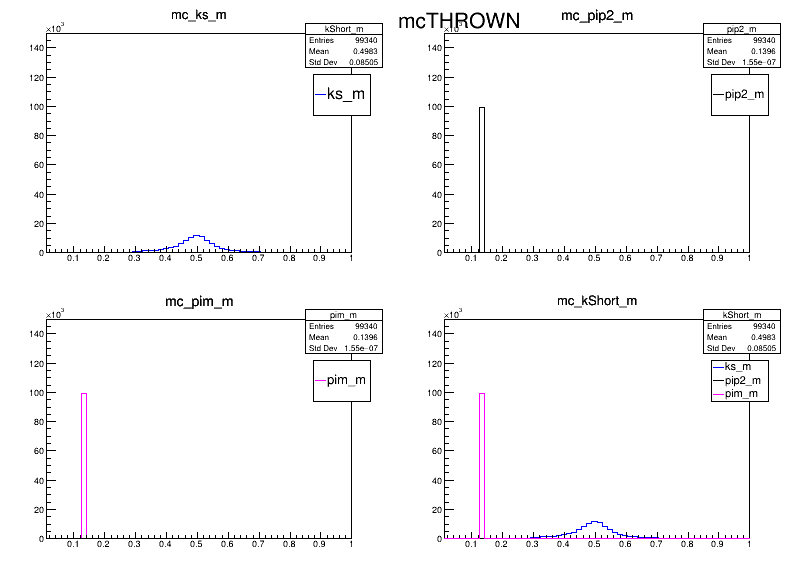

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file ../_plotsMC/mcKShort.png has been created


In [11]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df
    ############################

    min_height = -50
    max_height = 150000

    canvas = ROOT.TCanvas("c1", "c1", 800, 600)
    canvas.Divide(2, 2)

    canvas.cd(1)
    h1 = dfFiltered.Histo1D(('kShort_m', 'mc_ks_m', 60, 0.01, 1.0), 'kShort_m') # arguments: (name, title, bins, min, max), columnVariable
    h1.SetLineColor(ROOT.kBlue)
    h1.SetMinimum(min_height)
    h1.SetMaximum(max_height)
    # h1.SetStats(False)
    h1.Draw()
    legend1 = ROOT.TLegend(0.8, 0.60, 0.95, 0.75)
    legend1.AddEntry(h1.GetValue(), 'ks_m', 'l')
    legend1.Draw('same')

    canvas.cd(2)
    h2 = dfFiltered.Histo1D(('pip2_m', 'mc_pip2_m', 60, 0.01, 1.0), 'pip2_m')
    h2.SetLineColor(ROOT.kBlack)
    h2.SetMinimum(min_height)
    h2.SetMaximum(max_height)
    # h2.SetStats(False)
    h2.Draw('same')
    legend2 = ROOT.TLegend(0.8, 0.60, 0.95, 0.75)
    legend2.AddEntry(h2.GetValue(), 'pip2_m', 'l')
    legend2.Draw('same')

    canvas.cd(3)
    h3 = dfFiltered.Histo1D(('pim_m', 'mc_pim_m', 60, 0.01, 1.0), 'pim_m')
    h3.SetLineColor(ROOT.kMagenta)
    h3.SetMinimum(min_height)
    h3.SetMaximum(max_height)
    # h3.SetStats(False)
    h3.Draw('same')
    legend3 = ROOT.TLegend(0.8, 0.60, 0.95, 0.75)
    legend3.AddEntry(h3.GetValue(), 'pim_m', 'l')
    legend3.Draw('same')

    canvas.cd(4)
    h4 = dfFiltered.Histo1D(('kShort_m', 'mc_kShort_m', 60, 0.01, 1.0), 'kShort_m')
    h4.SetLineColor(ROOT.kBlue)
    h4.SetMinimum(min_height)
    h4.SetMaximum(max_height)
    # h4.SetStats(False)
    h4.Draw('same')
    h5 = dfFiltered.Histo1D(('pip2_m', 'mc_pip2_m', 60, 0.01, 1.0), 'pip2_m')
    h5.SetLineColor(ROOT.kBlack)
    h5.SetMinimum(min_height)
    h5.SetMaximum(max_height)
    # h5.SetStats(False)
    h5.Draw('same')
    h6 = dfFiltered.Histo1D(('pim_m', 'mc_pim_m', 60, 0.01, 1.0), 'pim_m')
    h6.SetLineColor(ROOT.kMagenta)
    h6.SetMinimum(min_height)
    h6.SetMaximum(max_height)
    # h6.SetStats(False)
    h6.Draw('same')
    legend4 = ROOT.TLegend(0.8, 0.60, 0.95, 0.75)
    legend4.AddEntry(h4.GetValue(), 'ks_m', 'l')
    legend4.AddEntry(h5.GetValue(), 'pip2_m', 'l')
    legend4.AddEntry(h6.GetValue(), 'pim_m', 'l')
    legend4.Draw('same')

    canvas.cd(0)
    title = ROOT.TLatex()
    title.SetNDC()
    title.SetTextFont(42)
    title.SetTextSize(0.04)
    title.DrawLatex(0.5, 0.95, "mcTHROWN")

    img_path = "../_plotsMC/mcKShort.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)


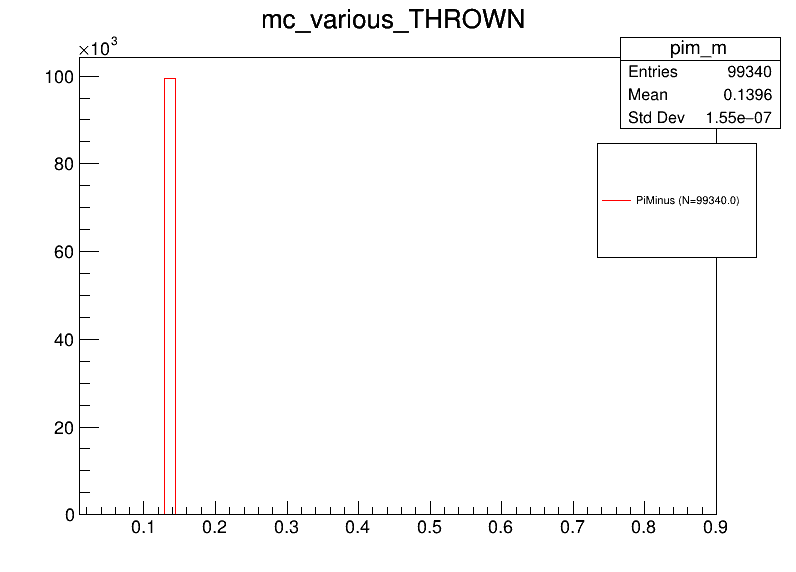

Info in <TCanvas::Print>: png file ../_plotsMC/mcVariousTHROWN.png has been created


In [12]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df # .Filter(select_kShort)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    # h1 = dfFiltered.Histo1D(('pip2_m', 'mc_various_THROWN', 60, 0.010, 0.9), 'pip2_m') # arguments: (name, title, bins, min, max), column)
    # # h1.SetStats(False)
    # h1.SetLineColor(ROOT.kBlue)
    # h1.Draw()
    h2 = dfFiltered.Histo1D(('pim_m', 'mc_various_THROWN', 60, 0.010, 0.9), 'pim_m')
    h2.SetLineColor(ROOT.kRed)
    h2.Draw("same")

    # Get the number of entries in each histogram
    # n_entries_h1 = h1.GetValue().GetEntries()
    n_entries_h2 = h2.GetValue().GetEntries()

    # Add legend
    legend = ROOT.TLegend(0.75, 0.55, 0.95, 0.75)  # (xLeft, yBottom, xRight, yTop)
    # legend.AddEntry(h1.GetValue(), f'PiPlus2 (N={n_entries_h1})', 'l')
    legend.AddEntry(h2.GetValue(), f'PiMinus (N={n_entries_h2})', 'l')
    legend.Draw()

    img_path = "../_plotsMC/mcVariousTHROWN.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)

### Histogram - KK $\pi$

In [ ]:
from IPython.display import Image, display

def plotting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Draw()
    
    img_path = "../_plotsMC/mcKKpi.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

plotting(dfKKpi)

### Dalitz Plots - (kShort  +  $\pi^{+}$) vs. (kMinus + $\pi^{+}$)

In [ ]:
from IPython.display import Image, display

def dalitzPlot(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_KKpi)
    ############################

    h2 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 60, 0.1, 1.4, 60, 0.1, 1.4), 'kspip1_m2', 'kmpip1_m2')
    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h2.SetStats(False)
    h2.Draw("colz")
    canvas.Update()
    
    img_path = "../_plotsMC/dalitzPlots/mcDalitzTEST.png"
    canvas.SaveAs(img_path)
    canvas.Draw()
    # canvas.Close()
    

    # # Display the saved image
    display(Image(filename=img_path))

dalitzPlot(dfKKpi)

## Fitting: define functions

In [ ]:
# Create various functions from 'ROOT' framework for fitting to histograms

# Breit-Wigner function
bw = ROOT.TF1("bw", "breitwigner(0)", 1.2, 1.7); # used to have BreitWigner(x, [4], [5])
# bw = ROOT.TF1("bw", "TMath::BreitWigner(x, [0], [1])", 0.4, 0.6)

# Exponential
exp = ROOT.TF1("exp", "TMath::Exp([0] + [1] * x + [2] * x * x)", 1.2, 1.7) # old c++ code defines this exponential as 'bkg'
exp.SetParName(0, "expPar1")
exp.SetParName(1, "expPar2")
exp.SetParName(2, "expPar3")

# Voigtian function
voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 1.2, 1.7)
voigtian.SetParName(0, "voigtian_amplitude")
voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the peak at the correct position, where we know the resonance to be.  It represents the particles mass.
voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
voigtian.SetParName(3, "voigtian_width") # ?? 'width' is the lorentzian width (natural width of the particle) ??

# Voigtian with RooVoigtian
# ???

######## COMBINED FUNCTIONS ########

# Voigtian + Exponential(3 parameters)
voigtian_plus_exp = ROOT.TF1("voigt_plus_expo3", "voigtian + exp", 0.1, 1.8)
voigtian_plus_exp.SetParameter(0, 4.5E2)
voigtian_plus_exp.SetParameter(1, 1.45807E0)
voigtian_plus_exp.SetParameter(2, 1.0E-02)
voigtian_plus_exp.SetParameter(3, 3.81110E-06)
voigtian_plus_exp.SetParameter(4, -6.47E0)
voigtian_plus_exp.SetParameter(5, 9.29E0)
voigtian_plus_exp.SetParameter(6, -2.970E0)

## Fitting: plots

In [ ]:
# Change all my code to lazy execution, i.e. no functions, instead just put histos in a cell, then drawing, etc, in another cell

from IPython.display import Image, display

def fitting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Fit(voigtian_plus_exp, "RV")
    h1.Draw()
    voigtian_plus_exp.Draw("same")
    
    img_path = "../_plotsMC/mcKKpi_FIT_TEST.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

fitting(dfKKpi)